In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from collections import Counter
from imblearn.under_sampling import TomekLinks
import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


churn = pd.read_csv('churn.csv', index_col=0)

In [2]:
churn

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,top user states
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,1
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,1
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0,0
3329,68,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0,1
3330,28,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0,1
3331,184,1,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0,1


In [3]:
X = churn.drop(['churn'], axis = 1)
y = churn.churn

In [4]:
X

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2
3329,68,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3
3330,28,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2
3331,184,1,0,105,36.35,84,13.57,137,6.26,10,1.35,2


In [5]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

# Decision Tree - Grid Search

In [6]:
##Splitting the data with train_test_split

X_traintl, X_testtl, y_traintl, y_testtl = train_test_split(X, y, random_state=1)

In [7]:
y_traintl.value_counts()

0    2138
1     361
Name: churn, dtype: int64

In [8]:
## I am going to use TomekLinks to downsample because I have a significant class imbalance 
## in my churn variable.

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_traintl, y_traintl)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 2000, 1: 361})


In [9]:
tl = TomekLinks()
X_res, y_res = tl.fit_sample(X_traintl, y_traintl)


In [8]:
param_dict={'max_depth': range(1,10,1),'criterion': ['gini','entropy'], 'min_samples_leaf' : range(10,40,1), 'max_leaf_nodes': range(0,30,1), 'class_weight': ['balanced']}

In [9]:
# Using grid search to find the best parameters

gs = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid= param_dict,
                  scoring='f1', cv=3,verbose = 1, n_jobs=-1)

In [10]:
# Fitting

gs.fit(X_res, y_res)

Fitting 3 folds for each of 16200 candidates, totalling 48600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5100 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 10700 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 17900 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 26700 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 37100 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 48600 out of 48600 | elapsed:  1.1min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(0, 30),
                         'min_samples_leaf': range(10, 40)},
             scoring='f1', verbose=1)

In [11]:
gs.best_score_

0.7443197808703079

In [12]:
# The best parameters that the gridsearch found

gs.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 21,
 'min_samples_leaf': 10}

In [23]:
y_predsgs=gs.best_estimator_.predict(X_testtl)


In [40]:
# Much better recall than I got with KNN

recall_score(y_testtl,y_predsgs)

0.7622950819672131

In [41]:
f1_score(y_testtl,y_predsgs)

0.7153846153846154

## - Second Decision Tree Grid Search
## - This time scoring on Recall instead of F1

In [80]:
#GridSearch

gs2 = GridSearchCV(DecisionTreeClassifier(random_state=1),
                  param_grid= param_dict,
                  scoring='recall', cv=3,verbose = 1, n_jobs=-1)

In [81]:
#Fitting

gs2.fit(X_res, y_res)

Fitting 3 folds for each of 16200 candidates, totalling 48600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 10520 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 17720 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 26520 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 36920 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 48600 out of 48600 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(0, 30),
                         'min_samples_leaf': range(10, 40)},
             scoring='recall', verbose=1)

In [83]:
#Recall

gs2.best_score_

0.8504361799816346

In [84]:
##Finding out best parameters from the GridSearch

gs2.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 10}

In [85]:
y_predsgs2=gs2.best_estimator_.predict(X_testtl)


In [86]:
#Recall

recall_score(y_testtl,y_predsgs2)

0.7459016393442623

In [87]:
f1_score(y_testtl,y_predsgs2)

0.5723270440251572

## - Though it got a higher score on the training set, it did worse on the test set
## - It appears it overfits to training data when I use recall score

# Random Forest - Grid Search

## For my first Random Forest Grid Search, I will be scoring on F1

In [15]:
# Random Forest Grid Search

rf = RandomForestClassifier(class_weight='balanced', random_state=1)
param_dictrf={'n_estimators': [100,200], 'max_depth': range(3,10,1), 'criterion': ['gini','entropy'],'min_samples_leaf' : range(5,20,1), 'max_leaf_nodes': range(0,30,1)}
gs_forest=GridSearchCV(rf,param_dictrf,scoring='f1',cv=3,verbose=1,n_jobs=-2)

#Fitting
gs_forest.fit(X_res,y_res)

Fitting 3 folds for each of 12600 candidates, totalling 37800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 334 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-2)]: Done 834 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-2)]: Done 1534 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-2)]: Done 2339 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 2889 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 3539 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 4289 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 5139 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-2)]: Done 6089 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 7139 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-2)]: Done 8289 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-2)]: Done 9539 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-2)]: Done 10889 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-2)]: Done 12339 tasks    

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'max_leaf_nodes': range(0, 30),
                         'min_samples_leaf': range(5, 20),
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [16]:
# Finding out best parameters

gs_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_leaf_nodes': 29,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [45]:
#Feature_importances_ gives us an array that lets us know the strength of the relationship for each feature
# In predicting churn

gs_forest.best_estimator_.feature_importances_

array([0.02577201, 0.13089939, 0.05739601, 0.02420921, 0.2853505 ,
       0.02119778, 0.08372057, 0.02053281, 0.0414663 , 0.04456235,
       0.05409738, 0.2072108 , 0.00358489])

In [76]:


gs_forest.best_score_

y_predsgsf=gs_forest.best_estimator_.predict(X_testtl)

# Recall
recall_score(y_testtl,y_predsgsf)

0.819672131147541

## My strongest recall score so far

In [75]:
gs_forest.best_score_

y_predsgsf=gs_forest.best_estimator_.predict(X_testtl)
recall_score(y_testtl,y_predsgsf)

# F1 Score
f1_score(y_testtl,y_predsgsf)


0.7299270072992702

## I dropped all state features from my dataset, so I want to see 
## if that affects my recall score on my strongest model

In [26]:
new_rf = RandomForestClassifier(class_weight='balanced',
                                random_state=1,
                                criterion = 'entropy', 
                                max_depth = 6, 
                                max_leaf_nodes = 29, 
                                min_samples_leaf = 5, 
                                n_estimators= 200)

In [27]:
new_rf.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_leaf_nodes=29, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [28]:
y_predsnew_rff=new_rf.predict(X_testtl)

In [29]:
recall_score(y_testtl,y_predsnew_rff)

0.819672131147541

## It did not change my recall score at all
## This means it was an extremely unimportant feature and was rightfully dropped

In [36]:
X_res

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,66,0,0,85,35.31,112,16.72,83,11.78,3,1.84,1
1,81,0,0,121,22.08,105,19.56,123,6.32,3,3.59,0
2,16,0,0,84,24.62,141,14.02,75,10.42,4,2.21,2
3,61,1,0,103,13.29,149,16.65,100,4.86,6,2.73,2
4,47,0,27,89,28.05,118,10.82,95,12.80,4,2.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2356,116,0,19,104,26.47,118,15.76,116,8.67,2,2.21,3
2357,161,0,0,113,32.62,87,6.03,107,9.22,4,3.62,4
2358,93,0,0,78,16.73,129,21.22,114,11.17,4,3.83,1
2359,139,0,0,106,22.85,98,17.96,125,8.71,2,2.75,5


In [33]:
new_rf.feature_importances_

array([0.02186135, 0.13752638, 0.06046486, 0.02306122, 0.27173369,
       0.02237686, 0.08400496, 0.01737773, 0.04175593, 0.04600179,
       0.05317191, 0.22066333])

## Using feature_importances, we can see that international plan, total day charge, and customer service calls have the strongest relationships in predicting churn

## Comparing my model to a baseline model

In [60]:
# DummyClassifier

from sklearn.dummy import DummyClassifier

In [85]:
dummy_clf = DummyClassifier(random_state = 1)

In [86]:
dummy_clf.fit(X_res, y_res)

DummyClassifier(random_state=1, strategy='stratified')

In [87]:
y_predsdummy = dummy_clf.predict(X_testtl)

In [88]:
#Baseline Model Recall

recall_score(y_testtl,y_predsdummy)

0.1721311475409836

In [89]:
f1_score(y_testtl, y_predsdummy)

0.1693548387096774

## My model performs extremely well compared to a baseline model

## For my second Random Forest Grid Search, I will be scoring on recall

In [72]:
rf2 = RandomForestClassifier(class_weight='balanced', random_state=1)
param_dictrf2={'n_estimators': [100,200], 'max_depth': range(3,7,1), 'criterion': ['gini','entropy'],'min_samples_leaf' : range(1,27,1), 'max_leaf_nodes': range(20,32,1)}
gs_forest2=GridSearchCV(rf2,param_dictrf2,scoring='recall',cv=3,verbose=1,n_jobs=-2)

##Fitting
gs_forest2.fit(X_res,y_res)

Fitting 3 folds for each of 4992 candidates, totalling 14976 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-2)]: Done 1228 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-2)]: Done 1778 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 2428 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-2)]: Done 3178 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 4028 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 4978 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-2)]: Done 6028 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 7178 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-2)]: Done 8428 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-2)]: Done 9778 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-2)]: Done 11228 tasks      

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 7),
                         'max_leaf_nodes': range(20, 32),
                         'min_samples_leaf': range(1, 27),
                         'n_estimators': [100, 200]},
             scoring='recall', verbose=1)

In [73]:
gs_forest2.best_score_

0.8421028466483013

In [77]:
y_predsgsf2=gs_forest2.best_estimator_.predict(X_testtl)
recall_score(y_testtl,y_predsgsf2)

0.8278688524590164

In [78]:
f1_score(y_testtl,y_predsgsf2)

0.6579804560260586

##  Although the second Grid Search had a slightly higher recall, it came at a hit to F1. I am primarily interested in Recall but do not want a poor F1, either. 


## Voting Classifier

In [88]:
## Loading my knn model

knn3 = pickle.load(open('knn3.pkl', 'rb'))

In [89]:
##Train_test_split

X_trainvc, X_testvc, y_trainvc, y_testvc = train_test_split(X, y, random_state=1)

In [90]:
vclf = VotingClassifier(estimators=[('gs_forest', gs_forest), ('knn3', knn3), ('gs', gs), ('gs_forest2', gs_forest2)], voting = 'hard')



In [92]:
# Fitting a voting classifier with hard voting

vclf = vclf.fit(X_trainvc,y_trainvc)

Fitting 3 folds for each of 12600 candidates, totalling 37800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-2)]: Done 213 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-2)]: Done 711 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-2)]: Done 1064 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-2)]: Done 1514 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-2)]: Done 2064 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 2714 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 3464 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 4314 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 5264 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-2)]: Done 6314 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 7464 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-2)]: Done 8714 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-2)]: Done 10064 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-2)]: Done 11514 tasks    

Fitting 3 folds for each of 16200 candidates, totalling 48600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5640 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 11240 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 18440 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 27240 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 37640 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 48600 out of 48600 | elapsed:  1.2min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.


Fitting 3 folds for each of 4992 candidates, totalling 14976 fits


[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-2)]: Done 778 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-2)]: Done 1228 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-2)]: Done 1778 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 2428 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 3178 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-2)]: Done 4028 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 4978 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-2)]: Done 6028 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-2)]: Done 7178 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-2)]: Done 8428 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-2)]: Done 9778 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-2)]: Done 11228 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-2)]: Done 12778 tasks      | elapsed: 10

In [93]:
preds = vclf.predict(X_testvc)

In [94]:
f1_score(y_testvc, preds)

0.7389558232931727

In [95]:
recall_score(y_testvc, preds)

0.7540983606557377

## Good recall, but does not beat out my strongest model

## XGBOOST

## Testing to see if XGBOOST gives my model any recall gains

In [10]:
import xgboost as xgb

In [21]:
xgb_clf=xgb.XGBClassifier(random_state=1)

## XGBOOST Parameter List

params={'min_child_weight': [1,5,10],
        'max_depth':[1,3,5,7,9,11],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'learning_rate':[.01,.1,.5,1],
        'max_delta_step':[1,3,5,7],
        'booster':['dart','gbtree','gblinear']}

In [22]:
xgb_grid=GridSearchCV(xgb_clf,params,cv=3,verbose=1,n_jobs=-1)

In [23]:
##Fitting

xgb_grid.fit(X_res,y_res)

Fitting 3 folds for each of 38880 candidates, totalling 116640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

GridSearchCV(cv=3, estimator=XGBClassifier(random_state=1), n_jobs=-1,
             param_grid={'booster': ['dart', 'gbtree', 'gblinear'],
                         'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_delta_step': [1, 3, 5, 7],
                         'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [24]:

xgb_grid.best_score_

0.9555273189326557

In [25]:
y_predsxg=xgb_grid.best_estimator_.predict(X_testtl)
recall_score(y_testtl,y_predsxg)

0.7540983606557377

## Does not beat out my strongest model

## Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_testtl,y_predsnew_rff)
classes = ['Retain', 'Churn']

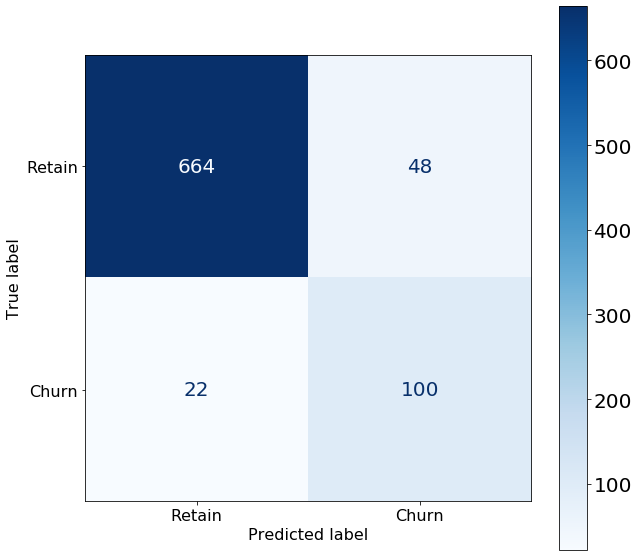

In [49]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

plt.rcParams.update({'font.size': 20})

plot_confusion_matrix(new_rf, X_testtl, y_testtl, cmap=plt.cm.Blues, display_labels = classes, ax=ax)



## As you can see, not only does my model have a very strong recall, it's just a very well performing model all around.

In [50]:
fig.savefig('Churn Confusion Matrix.png')